# I. Setup

In [58]:
# import
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.preprocessing import OneHotEncoder, RobustScaler, LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode
from textblob import TextBlob, Blobber
from textblob_fr import PatternTagger, PatternAnalyzer


from utils import data_preproc

In [2]:
# import dataset et preproc
data = pd.read_csv("data/dataset.csv", sep = ",")

# # drop la colonne total_length
# data = data.drop("total_length", axis=1)

# # drop les lignes où certificate_eligible ou grade = na 
# data.dropna(subset=['certificate_eligible', 'grade'], inplace = True) 

# # binarise la variable certificate_eligible
# data['diplome'] = LabelEncoder().fit_transform(data['certificate_eligible'])

# data.head()

In [3]:
# def data_preproc(data):
#     #garde seulement lignes où certificate_eligible et grade ne sont pas null
#     data.dropna(subset=['certificate_eligible', 'grade'], inplace = True)

#     # vire colonne inutile total_length
#     data = data.drop("total_length", axis=1)

#     # encode le label
#     data['certificate_eligible'] = LabelEncoder().fit_transform(data['certificate_eligible'])

#     #prépare le corpus pour textblob
#     data["corpus"]= data["corpus"].str.lower()
#     # enlever les accents
#     unidec_corpus = []
#     for (i, row) in data.iterrows():
#         truc = unidecode(row['corpus'])
#         # print(f"user: {row['user']} course :{row['course_id']} new_corp:{truc[:25]}")
#         unidec_corpus.append(truc)

#     data["corpus"] = unidec_corpus

#     tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

#     polarity = []
#     subjectivity = []

#     for (i, row) in data.iterrows():
#         # if i>10: quit()
#         blob = tb(row['corpus'])
#         # print(f"user: {row['user']} course :{row['course_id']} sentiment:{blob.sentiment}")
#         polarity.append(blob.sentiment[0])
#         subjectivity.append(blob.sentiment[1])

#     #update le dataset avec les nouvelles valeurs
#     data['polarity']=polarity
#     data['subjectivity']=subjectivity

#     return(data)

In [5]:
data = data_preproc(data)
data.head()

,user,gender,country,level_of_education,course_id,nb_threads,nb_comments,corpus,delai_1er_post,grade,certificate_eligible,polarity,subjectivity
10,-Luca-,NaN,NaN,NaN,course-v1:MinesTelecom+04017+session03,0,1,"bonjour, je m'appelle luca, je suis consultant...",5,0.38,0,0.126667,0.275000
44,0cbr,NaN,NaN,NaN,course-v1:MinesTelecom+04018+session03,0,1,"bonjour,\nj'ai le meme type de pb .\nje n arri...",28,0.80,1,-0.200000,0.300000
46,0cbr,NaN,NaN,NaN,MinesTelecom/04021S02/session02,1,0,beaucoup de temps passe sur le net pour compre...,26,0.35,0,0.043750,0.325000
57,123AZER,NaN,NaN,NaN,CNAM/01002S04/session04,1,0,"bonjour, nicolas 50 ans officier de sapeurs-po...",10,0.77,1,0.174286,0.278571
68,12nono12,NaN,NaN,NaN,MinesTelecom/04017S02/session02,0,1,"en fait dans le simulateur, le servo moteur se...",31,0.98,1,0.015000,0.175000


In [5]:
data.describe(include = object)

,user,gender,country,level_of_education,course_id,corpus
count,5349,869,589,656,5349,5349
unique,4329,2,37,9,15,5348
top,EGo41,m,FR,m,MinesTelecom/04017/session01,idem
freq,14,758,484,286,868,2


In [6]:
data.describe(exclude = object)

,nb_threads,nb_comments,delai_1er_post,grade,certificate_eligible,polarity,subjectivity
count,5349.000000,5349.000000,5349.000000,5349.000000,5349.000000,5349.000000,5349.000000
mean,1.276313,3.496354,15.509441,0.618854,0.618433,0.134574,0.271865
std,1.856361,20.364191,22.865337,0.367677,0.485816,0.152221,0.420495
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-0.600000
25%,0.000000,0.000000,3.000000,0.260000,0.000000,0.044286,0.153571
50%,1.000000,1.000000,9.000000,0.770000,1.000000,0.122692,0.245625
75%,1.000000,2.000000,20.000000,0.950000,1.000000,0.210000,0.330000
max,25.000000,614.000000,931.000000,1.000000,1.000000,1.000000,17.650000


# II. Plots

## 1. Par user/mooc (n= 5349)

In [7]:
data.shape

(5349, 13)

/tmp/ipykernel_27112/1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

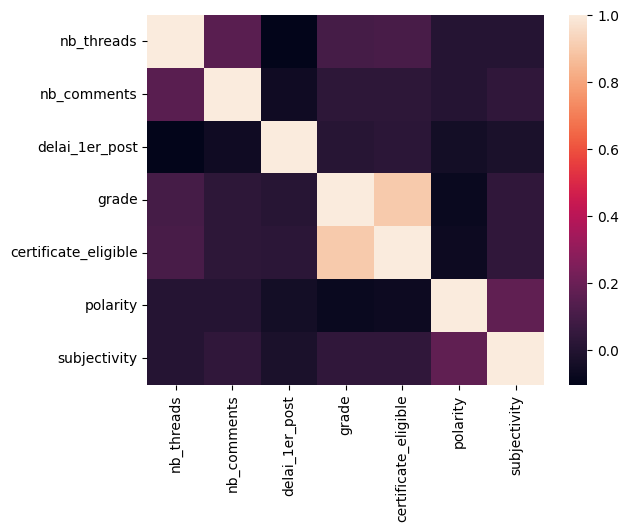

In [8]:
sns.heatmap(data.corr())

In [43]:
data[data.gender != "m"]

,user,gender,country,level_of_education,course_id,nb_threads,nb_comments,corpus,delai_1er_post,grade,certificate_eligible,polarity,subjectivity
10,-Luca-,NaN,NaN,NaN,course-v1:MinesTelecom+04017+session03,0,1,"bonjour, je m'appelle luca, je suis consultant...",5,0.38,0,0.126667,0.275000
44,0cbr,NaN,NaN,NaN,course-v1:MinesTelecom+04018+session03,0,1,"bonjour,\nj'ai le meme type de pb .\nje n arri...",28,0.80,1,-0.200000,0.300000
46,0cbr,NaN,NaN,NaN,MinesTelecom/04021S02/session02,1,0,beaucoup de temps passe sur le net pour compre...,26,0.35,0,0.043750,0.325000
57,123AZER,NaN,NaN,NaN,CNAM/01002S04/session04,1,0,"bonjour, nicolas 50 ans officier de sapeurs-po...",10,0.77,1,0.174286,0.278571
68,12nono12,NaN,NaN,NaN,MinesTelecom/04017S02/session02,0,1,"en fait dans le simulateur, le servo moteur se...",31,0.98,1,0.015000,0.175000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63863,_Patrick_,NaN,NaN,NaN,course-v1:MinesTelecom+04021+session03,0,8,"bonsoir,\n\nla question est bien ambigue effec...",16,0.97,1,0.100192,0.226923
63869,_Patrick_,NaN,NaN,NaN,MinesTelecom/04017S02/session02,1,162,"bonsoir,\n\nje n'ai pas rencontre de souci pou...",0,0.98,1,0.120724,0.298089
63870,_Patrick_,NaN,NaN,NaN,MinesTelecom/04018S02/session02,1,61,"cool, c'est a cote de chez moi en plus !! j'ir...",1,1.00,1,0.100872,0.403213
63871,_Patrick_,NaN,NaN,NaN,MinesTelecom/04021S02/session02,2,8,"bonsoir,\n\nj'ai l'impression que tout le voca...",14,0.89,1,0.136042,0.284722


plot certif_elig selon genre

In [6]:
data_gender = data[data.certificate_eligible == 1].groupby('gender', dropna=False)['certificate_eligible'].count().reset_index()
data_gender0 = data[data.certificate_eligible == 0].groupby('gender', dropna=False)['certificate_eligible'].count().reset_index()

data_gender = data_gender.rename(columns={'certificate_eligible':'Yes'})
data_gender0 = data_gender0.rename(columns={'certificate_eligible':'No'})
data_gender['No'] = data_gender0['No']

print(data_gender)


  gender   Yes    No
0      f    66    45
1      m   495   263
2    NaN  2747  1733


In [23]:

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"},{"type": "pie"},{"type": "pie"}]],
                    subplot_titles=("Femmes", "Hommes", "NaN"))

#gender f
fig.add_trace(go.Pie(
     values=data_gender.iloc[[0], [1,2]].values.tolist()[0],
     labels=["Yes","No"
             ],
#      domain={x: [0.5, 1], y: [0, .5]},
     name="f"), 
     row=1, col=1)

#gender m
fig.add_trace(go.Pie(
     values=data_gender.iloc[[1], [1,2]].values.tolist()[0],
     labels=["Yes","No"
             ],
#      domain=dict(x=[0.5, 1.0]),
     name="m"),
     row=1, col=2)

#gender m
fig.add_trace(go.Pie(
     values=data_gender.iloc[[2], [1,2]].values.tolist()[0],
     labels=["Yes","No"
             ],
#      domain=dict(x=[0.5, 1.0]),
     name="NaN"),
     row=1, col=3)

fig.show()



plot certif_elig selon level of edu

In [24]:
data_level_of_education = data[data.certificate_eligible == 1].groupby('level_of_education', dropna=False)['certificate_eligible'].count().reset_index()
data_level_of_education0 = data[data.certificate_eligible == 0].groupby('level_of_education', dropna=False)['certificate_eligible'].count().reset_index()

data_level_of_education = data_level_of_education.rename(columns={'certificate_eligible':'Yes'})
data_level_of_education0 = data_level_of_education0.rename(columns={'certificate_eligible':'No'})
data_level_of_education['No'] = data_level_of_education0['No']

print(data_level_of_education)

  level_of_education   Yes    No
0                  a     1     5
1                  b    52    50
2                 el     6     4
3                 hs    81    36
4                jhs    38    13
5                  m   197    89
6               none     6     5
7              other    24     8
8                  p    29    12
9                NaN  2874  1819


In [50]:
nb_pies = data_level_of_education.shape[0]
range(nb_pies)
for i in range(nb_pies):
    r =  i//5 +1
    c = i%5 + 1
    print(f"i = {i}, r = {r}, c = {c}")
   

i = 0, r = 1, c = 1
i = 1, r = 1, c = 2
i = 2, r = 1, c = 3
i = 3, r = 1, c = 4
i = 4, r = 1, c = 5
i = 5, r = 2, c = 1
i = 6, r = 2, c = 2
i = 7, r = 2, c = 3
i = 8, r = 2, c = 4
i = 9, r = 2, c = 5


In [64]:
nb_pies = data_level_of_education.shape[0]

fig = make_subplots(rows=2, cols=5, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=tuple(data_level_of_education.level_of_education.tolist()))


fig.add_trace(go.Pie(
     values=data_level_of_education.iloc[[0], [1,2]].values.tolist()[0],
     labels=["Yes","No"
             ],
#      domain=dict(x=[0.5, 1.0]),
     name=data_level_of_education.level_of_education.tolist()[0]),
     row=1, col=1)

fig.add_trace(go.Pie(
     values=data_level_of_education.iloc[[1], [1,2]].values.tolist()[0],
     labels=["Yes","No"
             ],
#      domain=dict(x=[0.5, 1.0]),
     name=data_level_of_education.level_of_education.tolist()[0]),
     row=1, col=2)

fig.add_trace(go.Pie(
     values=data_level_of_education.iloc[[2], [1,2]].values.tolist()[0],
     labels=["Yes","No"
             ],
#      domain=dict(x=[0.5, 1.0]),
     name=data_level_of_education.level_of_education.tolist()[0]),
     row=1, col=3)

fig.add_trace(go.Pie(
     values=data_level_of_education.iloc[[3], [1,2]].values.tolist()[0],
     labels=["Yes","No"
             ],
#      domain=dict(x=[0.5, 1.0]),
     name=data_level_of_education.level_of_education.tolist()[0]),
     row=1, col=4)

fig.add_trace(go.Pie(
     values=data_level_of_education.iloc[[4], [1,2]].values.tolist()[0],
     labels=["Yes","No"
             ],
#      domain=dict(x=[0.5, 1.0]),
     name=data_level_of_education.level_of_education.tolist()[0]),
     row=1, col=5)

fig.add_trace(go.Pie(
     values=data_level_of_education.iloc[[5], [1,2]].values.tolist()[0],
     labels=["Yes","No"
             ],
#      domain=dict(x=[0.5, 1.0]),
     name=data_level_of_education.level_of_education.tolist()[0]),
     row=2, col=1)

fig.add_trace(go.Pie(
     values=data_level_of_education.iloc[[6], [1,2]].values.tolist()[0],
     labels=["Yes","No"
             ],
#      domain=dict(x=[0.5, 1.0]),
     name=data_level_of_education.level_of_education.tolist()[0]),
     row=2, col=2)

fig.add_trace(go.Pie(
     values=data_level_of_education.iloc[[7], [1,2]].values.tolist()[0],
     labels=["Yes","No"
             ],
#      domain=dict(x=[0.5, 1.0]),
     name=data_level_of_education.level_of_education.tolist()[0]),
     row=2, col=3)

fig.add_trace(go.Pie(
     values=data_level_of_education.iloc[[8], [1,2]].values.tolist()[0],
     labels=["Yes","No"
             ],
#      domain=dict(x=[0.5, 1.0]),
     name=data_level_of_education.level_of_education.tolist()[0]),
     row=2, col=4)

fig.add_trace(go.Pie(
     values=data_level_of_education.iloc[[9], [1,2]].values.tolist()[0],
     labels=["Yes","No"
             ],
#      domain=dict(x=[0.5, 1.0]),
     name=data_level_of_education.level_of_education.tolist()[0]),
     row=2, col=5)


fig.show()



ValueError: 
The 'specs' argument to make_subplots must be a 2D list of dictionaries with dimensions (2 x 5).
    Received value of type <class 'list'>: [[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}]]

## Par user (n = 4329)

In [10]:
# Création jeu de données avec une seule ligne par user
# count de mooc
data_by_user = data.groupby('user')['course_id'].count().reset_index()

# somme de threads et comments
nb_mess = data.groupby('user')[['nb_threads','nb_comments']].sum().reset_index()

#moyenne de delai de post du premier message
moy_delai = data.groupby('user')['delai_1er_post'].mean().reset_index()

# nb de diplomes
nb_diplome = data.groupby('user')['certificate_eligible'].sum().reset_index()

# rassembler les variables dans le df
data_by_user[['nb_threads','nb_comments']] = nb_mess[['nb_threads','nb_comments']]
data_by_user['moy_delai'] = moy_delai["delai_1er_post"]
data_by_user['nb_diplome'] = nb_diplome["certificate_eligible"]

#calcul de nouvelles variables intermediaires
data_by_user['nb_messages'] = data_by_user["nb_threads"] + data_by_user["nb_comments"]
data_by_user['prop_succes'] = data_by_user["nb_diplome"] / data_by_user["course_id"]
data_by_user = data_by_user.rename(columns = {"course_id" : "nb_mooc"})
# data_by_user

# on devrait pouvoir rajouter les infos de genre, country et level of ed avec une methode de groupby... peut etre unique?
gender = data.groupby('user')["gender"].first().reset_index()
data_by_user['gender'] = gender["gender"]

country = data.groupby('user')["country"].first().reset_index()
data_by_user['country'] = country["country"]

level_of_education = data.groupby('user')["level_of_education"].first().reset_index()
data_by_user['level_of_education'] = level_of_education["level_of_education"]

data_by_user

,user,nb_mooc,nb_threads,nb_comments,moy_delai,nb_diplome,nb_messages,prop_succes,gender,country,level_of_education
0,-Luca-,1,0,1,5.0,0,1,0.0,None,None,None
1,0cbr,2,1,1,27.0,1,2,0.5,None,None,None
2,123AZER,1,1,0,10.0,1,1,1.0,None,None,None
3,12nono12,1,0,1,31.0,1,1,1.0,None,None,None
4,181250,1,1,0,9.0,0,1,0.0,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
4324,zoam14NORA,1,1,0,34.0,0,1,0.0,m,FR,el
4325,zoublos,1,0,2,64.0,1,2,1.0,None,None,None
4326,zraoul,1,0,1,13.0,0,1,0.0,None,None,None
4327,zrash,2,5,3,9.5,1,8,0.5,None,None,None


### Corr heatmap

/tmp/ipykernel_27112/327953006.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_by_user.corr())


<AxesSubplot: >

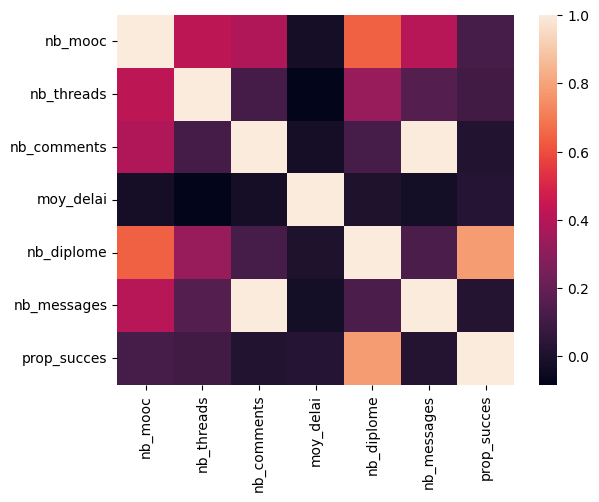

In [11]:
# correlation heatmap
sns.heatmap(data_by_user.corr())

### repartition des genres, country, level_of_ed

In [12]:
# pieplot du nb de genre
fig = px.pie(data_by_user, 
             values='nb_mooc', 
             names='gender', 
             title='Répartition des genres des users')
fig.show()

In [13]:
# pieplot du nb de country
fig = px.pie(data_by_user, 
             values='nb_mooc', 
             names='country', 
             title='Répartition des pays des users')
fig.show()

In [ ]:
# # on drop les null
# # pas forcément utile car on peut déselectionner null sur plotly pour avoir le même résultat
# fig = px.pie(data_by_user.dropna(subset="country"), 
#              values='nb_mooc', 
#              names='country', 
#              title='Répartition des pays des users')
# fig.show()

In [14]:
# pieplot du nb de levels_of_education
fig = px.pie(data_by_user, 
             values='nb_mooc', 
             names='level_of_education', 
             title="Répartition des niveaux d'étude des users")
fig.show()
# se renseigner sur les significations !

### exploration des users pour repérer outliers

In [15]:
# plot nb de mooc par user, mappé par le taux de succès
fig = px.bar(data_by_user.sort_values(by='nb_mooc', ascending = False)[:50], 
             x='user', 
             y='nb_mooc',
             title="Nombre de MOOC par user",
             color='prop_succes')
fig

In [16]:
#  nb messages et threads par user
fig = px.bar(data_by_user.sort_values(by='nb_messages', ascending = False)[:50], 
             x="user", 
             y=["nb_threads", "nb_comments"], 
             title="Nb de messages par user")
fig.show()

In [17]:
# nb_threads par user
fig = px.bar(data_by_user.sort_values(by='nb_threads', ascending = False)[:100], 
             x="user", 
             y="nb_threads", 
             title="Nb de threads par user")
fig.show()

In [18]:
# prop succès en fonction du nb messages
fig = px.scatter(data_by_user, 
             x="nb_messages", 
             y="prop_succes",
             hover_name = "user",
             title="Prop succès selon nb messages")
fig.show()

In [19]:
fig = px.scatter(data_by_user, 
             x="nb_threads", 
             y="prop_succes", 
             hover_name = "user",
             title="Prop succès selon nb threads")
fig.show()

In [20]:
fig = px.scatter(data_by_user, 
             x="nb_comments", 
             y="prop_succes", 
             hover_name = "user",
             title="Prop succès selon nb comments")
fig.show()

Au vu de ces différentes infos, on va explorer le corpus pour les quelques points suspects

In [36]:
pd.set_option('display.max_colwidth', None)
print(data[data.user == "EGo41"]["corpus"][:])
pd.set_option('display.max_colwidth', 50)
# il répond aux questions: Emmanuel est bien un admin!!

17548                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [35]:
pd.set_option('display.max_colwidth', None)
print(data[data.user == "trx337"]["corpus"][:])
pd.set_option('display.max_colwidth', 50)
# visiblement il pose des questions, ce n'est pas un admin

59780                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [37]:
pd.set_option('display.max_colwidth', None)
print(data[data.user == "bgaultier"]["corpus"][:])
pd.set_option('display.max_colwidth', 50)
# c'est un admin !

7715                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [38]:
pd.set_option('display.max_colwidth', None)
print(data[data.user == "EllaHamonic"]["corpus"][:])
pd.set_option('display.max_colwidth', 50)
# c'est un admin !

18019                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [40]:
pd.set_option('display.max_colwidth', None)
print(data[data.user == "stiphaen"]["corpus"][:])
pd.set_option('display.max_colwidth', 50)
# c'est un admin !

57115                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   